# Введение

В качестве предметной области был выбран набор данных, содержащий данные об автомобилях, проданных за некоторый период на территории США.

Задача данной работы - предсказание цены автомобиля на основе нескольких факторов. Данная задача может быть актуальна для автомобильной компании, планирующей свой выход на автомобильный рынок США, открыв там свое производственное предприятие и производя автомобили локально, чтобы составить конкуренцию своим американским и европейским аналогам. 

Решение этой задачи может быть использовано руководством автомобильной компании для понимания того, как именно цены изменяются в зависимости от характеристик автомобилей. С использованием этих данных, оно сможет более оптимально разарабатывать новые модели своих автомобилей, чтобы соответствовать определенным ценовым сегментам. Кроме того, построенная модель регрессии может стать хорошим способом для понимания динамики ценообразования на новом рынке.

# Основная часть

## Поставновка задачи

Необходимо решить задачу регрессии по прогнозированию цен на автомобили с использованием материалов дисциплины «Технологии машинного обучения».

## Выбор набора данных для построения моделей машинного обучения

### Текстовое описание

Данный набор доступен по адресу: https://www.kaggle.com/datasets/goyalshalini93/car-data

Набор данных имеет следующие атрибуты:

- car_ID - порядковый номер строки
- symboling - обозначение
- CarName - марка + модель автомобиля
- fueltype - тип топлива
- aspiration - тип подачи воздуха в двигатель (атмосферный/турбированный)
- doornumber - число дверей
- carbody - тип кузова
- drivewheel - привод
- enginelocation - расположение двигателя
- wheelbase - длина колесной базы
- carlength - длина автомобиля
- carwidth - ширина автомобиля
- carheight - высота автомобиля
- curbweight - снаряженная масса
- enginetype - тип двигателя
- cylindernumber - число цилиндров
- enginesize - объем двигателя
- fuelsystem - тип топливной системы
- boreratio - интерес для покупателя
- stroke - поршни
- compressionratio - компрессия
- horsepower - лошадиные силы
- peakrpm - обороты в минуты, при которых достигается максимальный момент
- citympg - расход топлива по городу
- highwaympg - расход по трассе
- price - цена

Решается задача регрессии. В качестве целевого признака - цена.

### Импорт библиотек

Импортируем необходимые начальные библиотеки:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

Загрузим данные:

In [2]:
data = pd.read_csv('car.csv')

## Разведочный анализ данных

### Основные характеристики

Первые 5 строк датасета:

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Размер датасета:

In [4]:
data.shape

(205, 26)

Столбцы:

In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Типы данных:

In [6]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### Обработка данных с неинформативными признаками

В датасете присутствуют данные, которые не несут полезной информации для дальнейшего анализа.

Аналитически посчитаем неинформативные признаки (у которых более 90% строк имеют одинаковое значение):

In [7]:
num_rows = len(data.index)
low_information_cols = [] #

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

fueltype: 90.24390%
fueltype
gas       185
diesel     20
Name: count, dtype: int64

enginelocation: 98.53659%
enginelocation
front    202
rear       3
Name: count, dtype: int64



Удалим соответствующие столбцы:

In [8]:
data.drop(['fueltype', 'enginelocation'], inplace=True, axis=1)

Некоторые столбцы также не представляют ценности для дальнейшего анализа. Также удалим их:

In [9]:
data.drop(['car_ID', 'symboling', 'enginesize', 'stroke', 'compressionratio'], inplace=True, axis=1)

Проверим корректность удаления:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   aspiration      205 non-null    object 
 2   doornumber      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   carlength       205 non-null    float64
 7   carwidth        205 non-null    float64
 8   carheight       205 non-null    float64
 9   curbweight      205 non-null    int64  
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    object 
 12  fuelsystem      205 non-null    object 
 13  boreratio       205 non-null    float64
 14  horsepower      205 non-null    int64  
 15  peakrpm         205 non-null    int64  
 16  citympg         205 non-null    int64  
 17  highwaympg      205 non-null    int

### Обработка пропусков

Определим столбцы с пропусками данных:

In [11]:
data.isnull().sum()

CarName           0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
enginetype        0
cylindernumber    0
fuelsystem        0
boreratio         0
horsepower        0
peakrpm           0
citympg           0
highwaympg        0
price             0
dtype: int64

Видим, что в наборе данных отсутствуют пропуски.

### Переименование столбцов

Для более удобной дальнейшей работы переименуем столбцы:

In [15]:
data.rename(columns = {'doornumber' : 'doors', 'carbody' : 'body', 'drivewheel' : 'drive', 'carlength' : 'length', 'carwidth' : 'width', 'carheight' : 'height', 'curbweight' : 'weight', 'cylindernumber' : 'cyl', 'boreratio' : 'bore'}, inplace = True)

In [16]:
data.head()

,CarName,aspiration,doors,body,drive,wheelbase,length,width,height,weight,enginetype,cyl,fuelsystem,bore,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,3.47,111,5000,21,27,13495.0
1,alfa-romero stelvio,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,3.47,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,mpfi,2.68,154,5000,19,26,16500.0
3,audi 100 ls,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,mpfi,3.19,102,5500,24,30,13950.0
4,audi 100ls,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,mpfi,3.19,115,5500,18,22,17450.0


### Преобразование столбцов

Преобразуем столбец, содержащий информацию о марке и модели, к двум отдельным столбцам:

In [18]:
data[['manuf', 'model']] = data['CarName'].str.split(' ', n=1, expand=True)
data.drop(['CarName'],axis=1,inplace=True)
data = data[['manuf', 'model', 'aspiration', 'doors', 'body', 'drive', 'wheelbase', 'length', 'width', 'height', 'weight', 'enginetype', 'cyl', 'fuelsystem', 'bore', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
data.head()

,manuf,model,aspiration,doors,body,drive,wheelbase,length,width,height,weight,enginetype,cyl,fuelsystem,bore,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,3.47,111,5000,21,27,13495.0
1,alfa-romero,stelvio,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,3.47,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,mpfi,2.68,154,5000,19,26,16500.0
3,audi,100 ls,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,mpfi,3.19,102,5500,24,30,13950.0
4,audi,100ls,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,mpfi,3.19,115,5500,18,22,17450.0


### Исправление ошибок

Проверим наличие ошибок:

In [19]:
data.manuf.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
data.model.unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [21]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [22]:
data.doors.unique()

array(['two', 'four'], dtype=object)

In [23]:
data.body.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [24]:
data.drive.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [25]:
data.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [26]:
data.cyl.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [27]:
data.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

В столбце производителя автомобилей есть небольшие ошибки. Исправим их:

In [28]:
data.manuf = data.manuf.str.lower()

def replace_name(a,b):
    data.manuf.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.manuf.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [29]:
data.head()

,manuf,model,aspiration,doors,body,drive,wheelbase,length,width,height,weight,enginetype,cyl,fuelsystem,bore,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,3.47,111,5000,21,27,13495.0
1,alfa-romero,stelvio,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,3.47,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,mpfi,2.68,154,5000,19,26,16500.0
3,audi,100 ls,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,mpfi,3.19,102,5500,24,30,13950.0
4,audi,100ls,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,mpfi,3.19,115,5500,18,22,17450.0


### Замена данных

В столбцах "doors" и "cyl" - объекты типа Object, числовые данные записаны в виде набора символов. Преобразуем их в числа:

In [30]:
doors = {'two': 2, 'four': 4}
data['doors'] = data['doors'].replace(doors)
data['doors'] = data['doors'].astype({"doors":"int64"})

cyl = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
data['cyl'] = data['cyl'].replace(cyl)
data['cyl'] = data['cyl'].astype({"cyl":"int64"})
data.head()

,manuf,model,aspiration,doors,body,drive,wheelbase,length,width,height,weight,enginetype,cyl,fuelsystem,bore,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,mpfi,3.47,111,5000,21,27,13495.0
1,alfa-romero,stelvio,std,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,mpfi,3.47,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,std,2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,6,mpfi,2.68,154,5000,19,26,16500.0
3,audi,100 ls,std,4,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,4,mpfi,3.19,102,5500,24,30,13950.0
4,audi,100ls,std,4,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,5,mpfi,3.19,115,5500,18,22,17450.0


### Структура данных

Построим множество графиков, отображающих структуру данных:

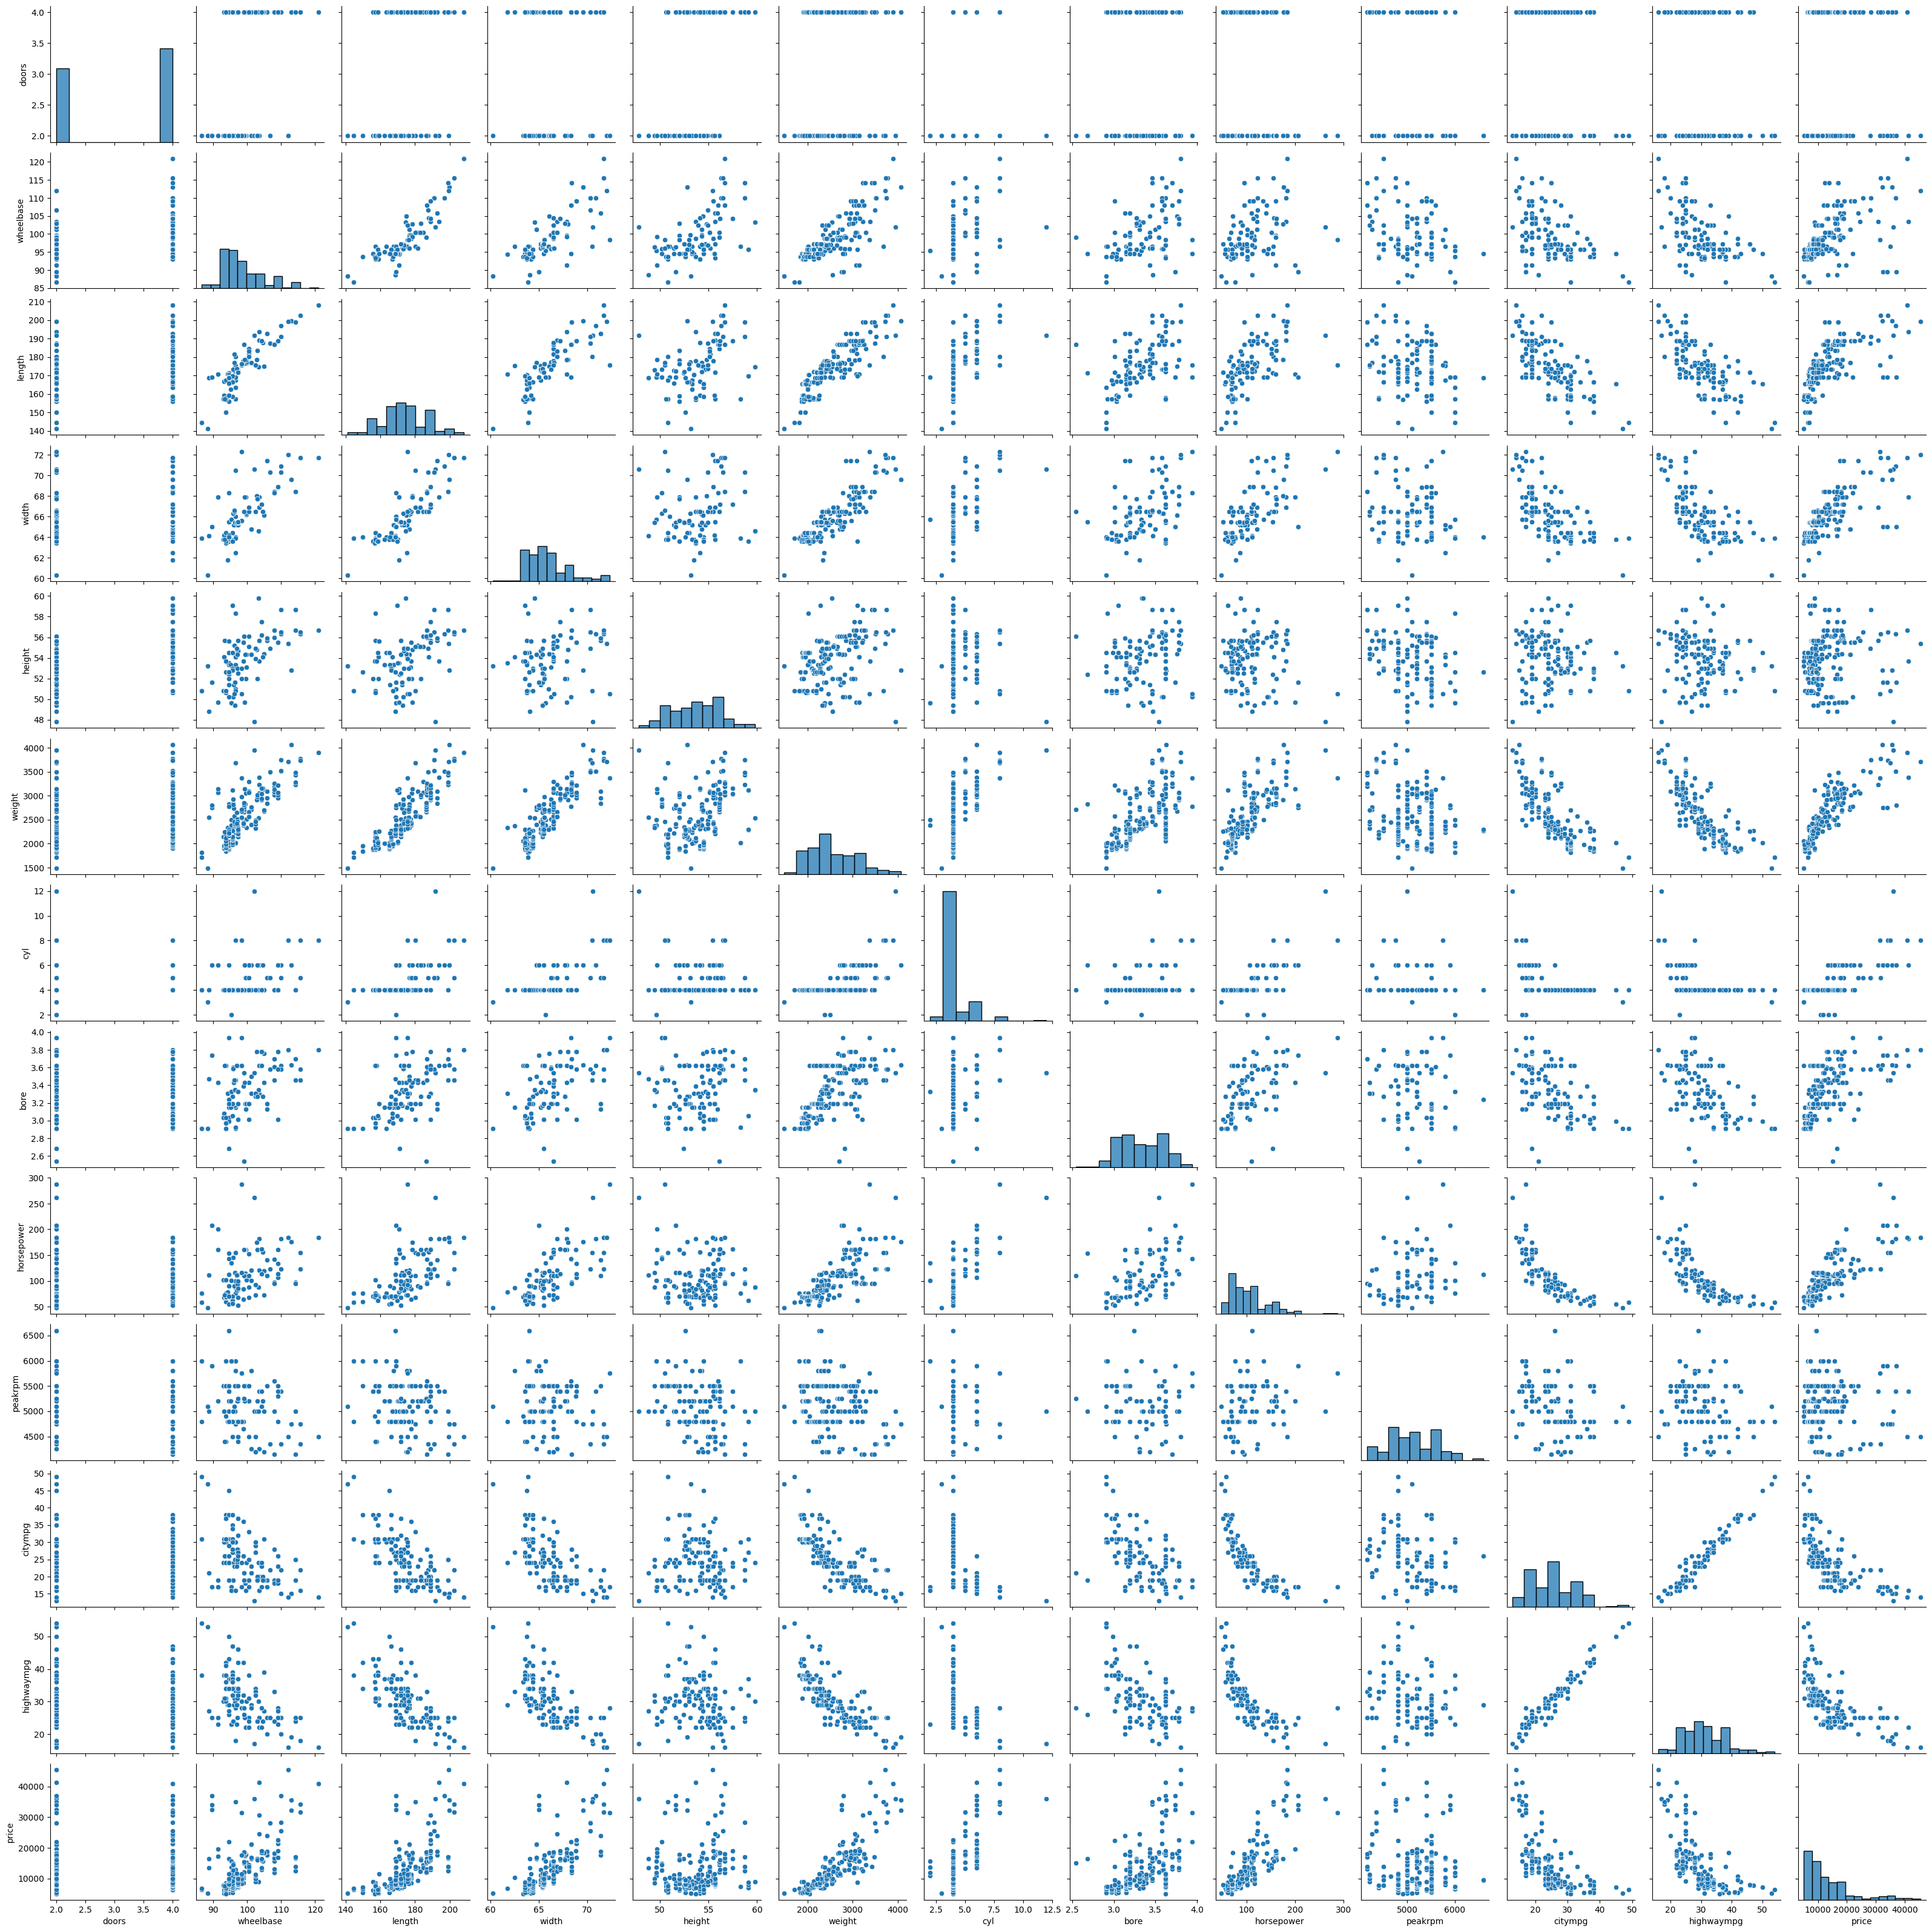

In [31]:
sns.pairplot(data)

Построим графики распределния цен:

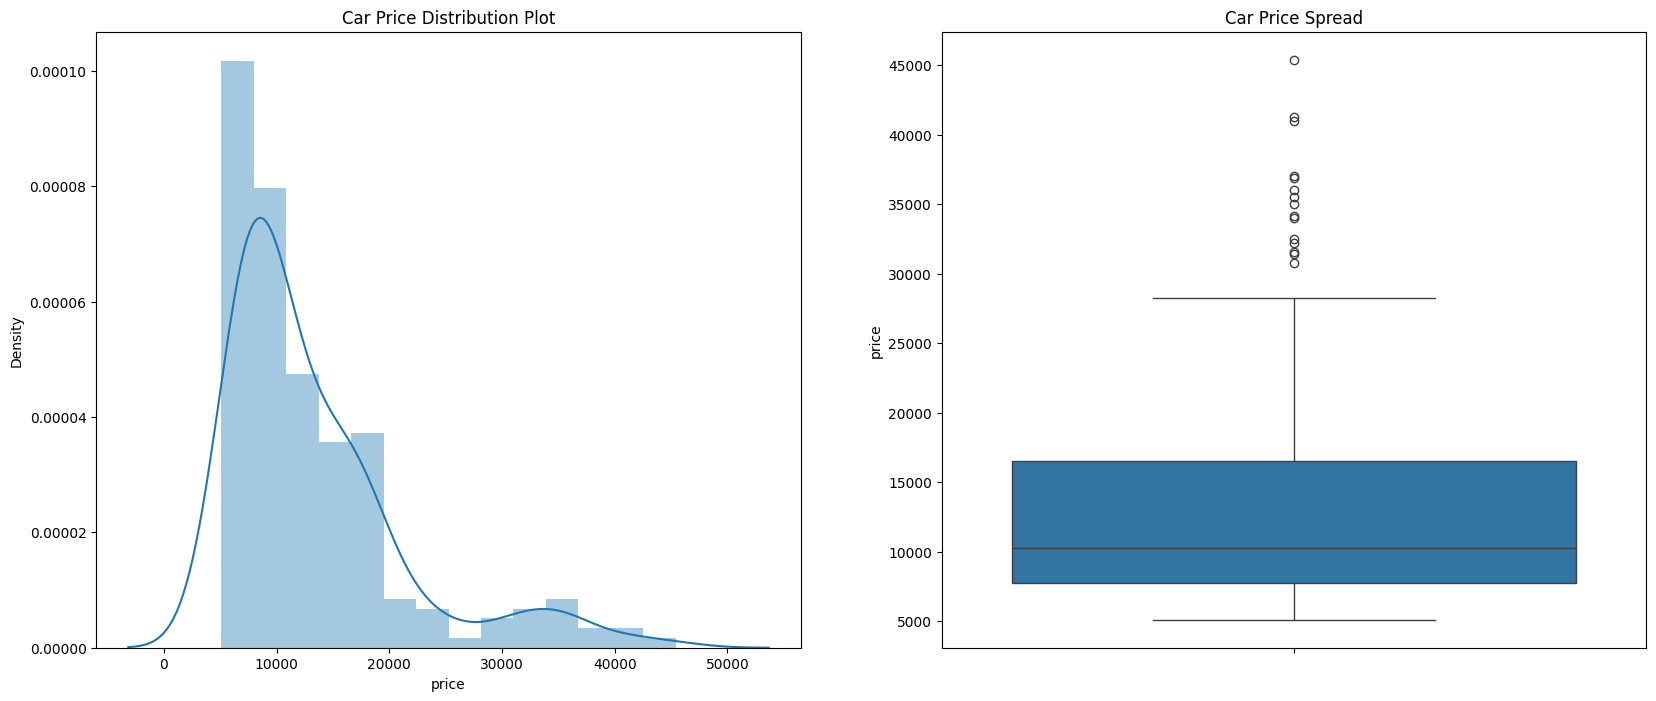

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

## Кодирование категориальных признаков и масштабирование данных

Определим типы данных в наборе:

In [33]:
data.dtypes

manuf          object
model          object
aspiration     object
doors           int64
body           object
drive          object
wheelbase     float64
length        float64
width         float64
height        float64
weight          int64
enginetype     object
cyl             int64
fuelsystem     object
bore          float64
horsepower      int64
peakrpm         int64
citympg         int64
highwaympg      int64
price         float64
dtype: object

### Кодирование категориальных признаков

Используя LabelEncoder из sckit-learn закодируем некоторые столбцы типа Object в числовые значения:

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
letypemanuf = LabelEncoder()
learrmanuf = letypemanuf.fit_transform(data["manuf"])
data["manuf"] = learrmanuf
data = data.astype({"manuf":"int64"})

In [36]:
letypemodel = LabelEncoder()
learrmodel = letypemodel.fit_transform(data["model"])
data["model"] = learrmodel
data = data.astype({"model":"int64"})

In [37]:
letypeasp = LabelEncoder()
learrasp = letypeasp.fit_transform(data["aspiration"])
data["aspiration"] = learrasp
data = data.astype({"aspiration":"int64"})

In [38]:
letypebody = LabelEncoder()
learrbody = letypebody.fit_transform(data["body"])
data["body"] = learrbody
data = data.astype({"body":"int64"})

In [39]:
letypedrive = LabelEncoder()
learrdrive = letypedrive.fit_transform(data["drive"])
data["drive"] = learrdrive
data = data.astype({"drive":"int64"})

In [40]:
letypetype = LabelEncoder()
learrtype = letypetype.fit_transform(data["enginetype"])
data["enginetype"] = learrtype
data = data.astype({"enginetype":"int64"})

In [41]:
letypefs = LabelEncoder()
learrfs = letypefs.fit_transform(data["fuelsystem"])
data["fuelsystem"] = learrfs
data = data.astype({"fuelsystem":"int64"})

In [42]:
data.head()

,manuf,model,aspiration,doors,body,drive,wheelbase,length,width,height,weight,enginetype,cyl,fuelsystem,bore,horsepower,peakrpm,citympg,highwaympg,price
0,0,78,0,2,0,2,88.6,168.8,64.1,48.8,2548,0,4,5,3.47,111,5000,21,27,13495.0
1,0,122,0,2,0,2,88.6,168.8,64.1,48.8,2548,0,4,5,3.47,111,5000,21,27,16500.0
2,0,28,0,2,2,2,94.5,171.2,65.5,52.4,2823,5,6,5,2.68,154,5000,19,26,16500.0
3,1,0,0,4,3,1,99.8,176.6,66.2,54.3,2337,3,4,5,3.19,102,5500,24,30,13950.0
4,1,1,0,4,3,0,99.4,176.6,66.4,54.3,2824,3,5,5,3.19,115,5500,18,22,17450.0


### Масштабирование данных

Проведем масштабирование данных MinMax с помощью средств из sckit-learn:

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data[data.columns])

Сохраним масштабированные данные:

In [45]:
data_scaled = pd.DataFrame()

In [46]:
for i in range(len(data.columns)):
    col = data.columns[i]
    new_col_name = col + '_scaled'
    data_scaled[new_col_name] = scaler_data[:,i]

In [47]:
data_scaled.head()

,manuf_scaled,model_scaled,aspiration_scaled,doors_scaled,body_scaled,drive_scaled,wheelbase_scaled,length_scaled,width_scaled,height_scaled,weight_scaled,enginetype_scaled,cyl_scaled,fuelsystem_scaled,bore_scaled,horsepower_scaled,peakrpm_scaled,citympg_scaled,highwaympg_scaled,price_scaled
0,0.000000,0.553191,0.0,0.0,0.00,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.000000,0.2,0.714286,0.664286,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.000000,0.865248,0.0,0.0,0.00,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.000000,0.2,0.714286,0.664286,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.000000,0.198582,0.0,0.0,0.50,1.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.833333,0.4,0.714286,0.100000,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.047619,0.000000,0.0,1.0,0.75,0.5,0.384840,0.529851,0.491667,0.541667,0.329325,0.500000,0.2,0.714286,0.464286,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.047619,0.007092,0.0,1.0,0.75,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.500000,0.3,0.714286,0.464286,0.279167,0.551020,0.138889,0.157895,0.306142


Масштабирование данных не повлияло на на распределение данных:

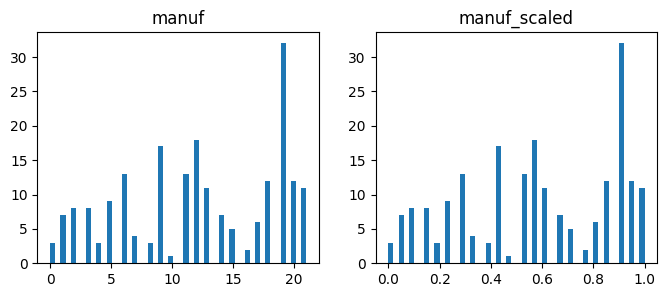

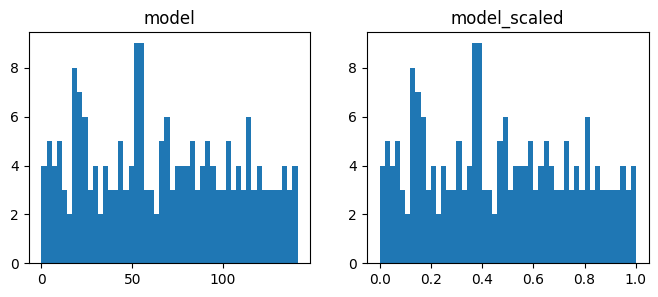

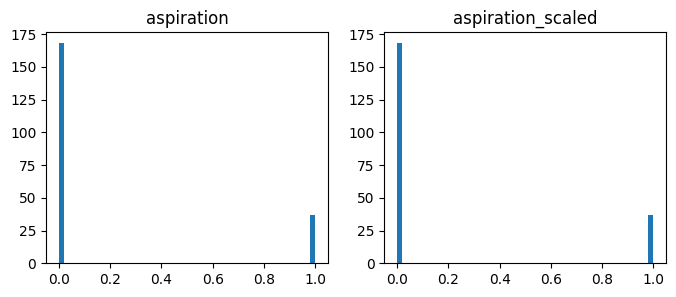

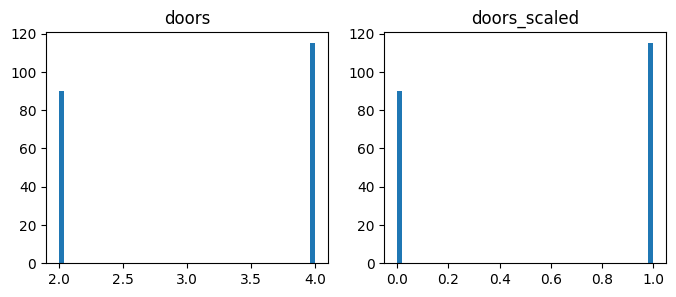

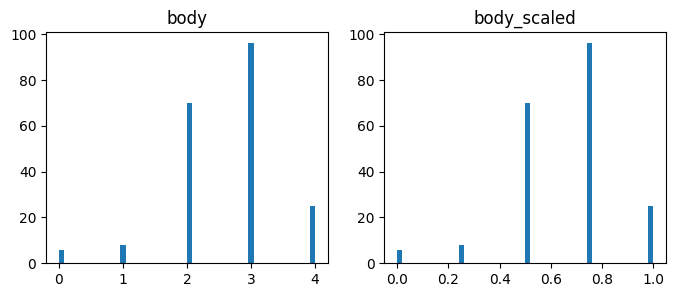

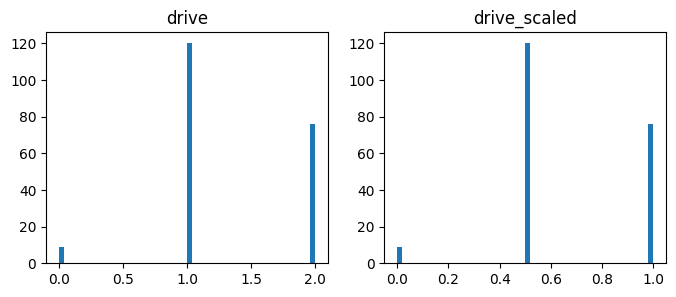

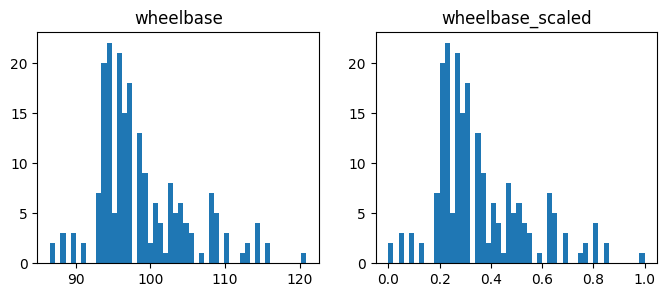

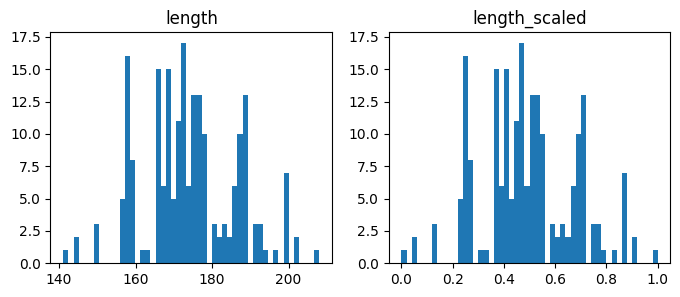

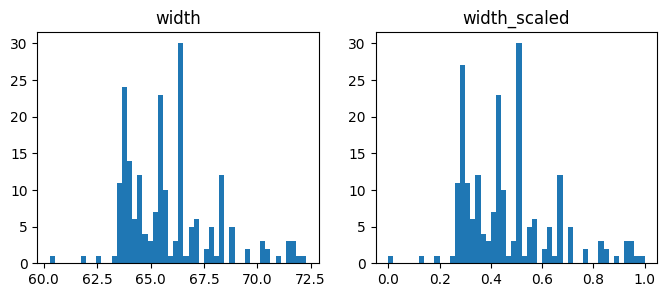

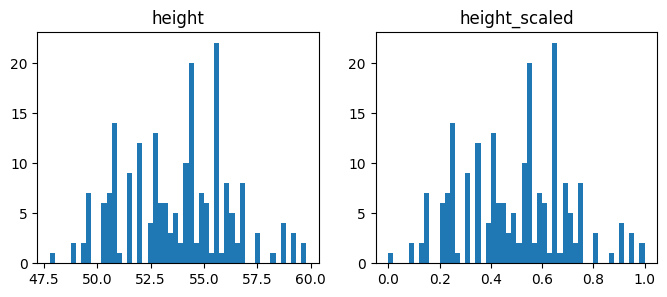

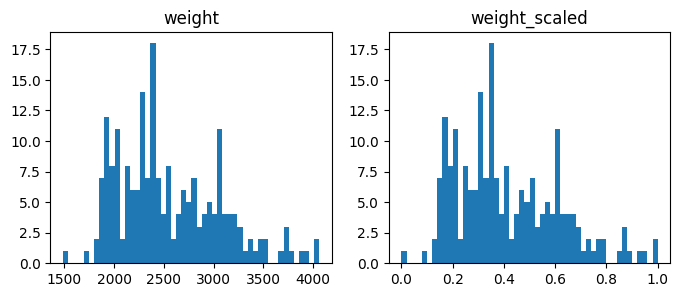

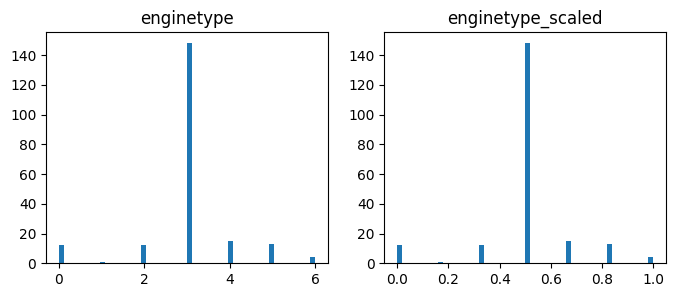

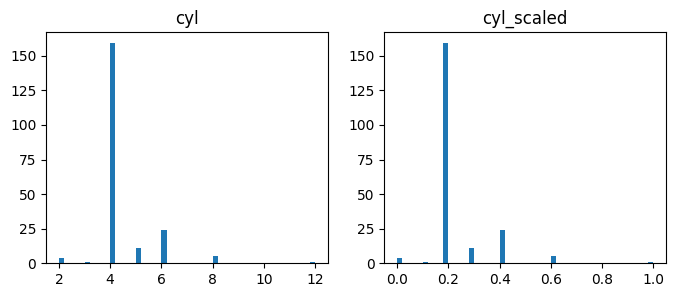

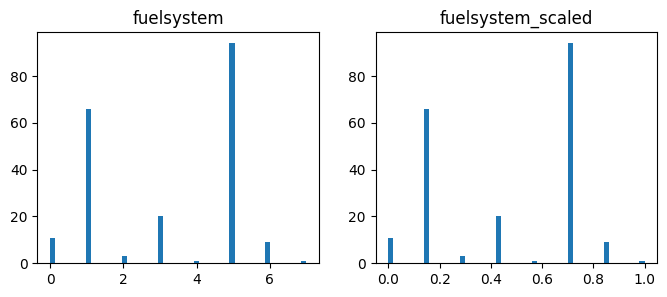

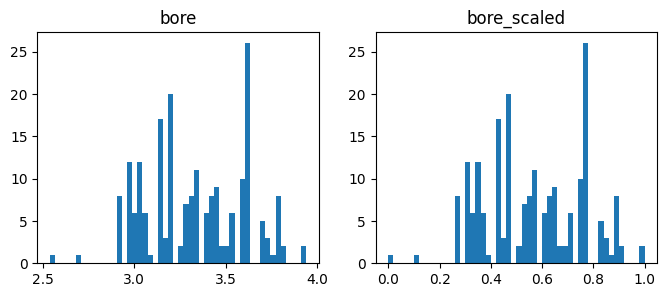

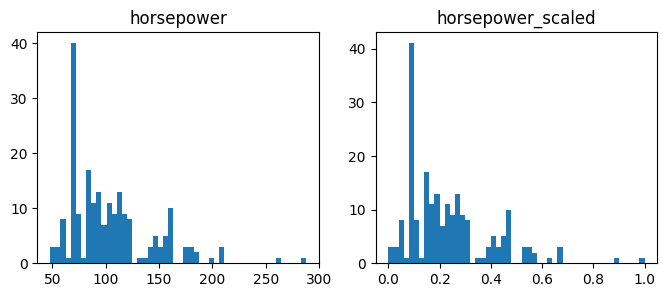

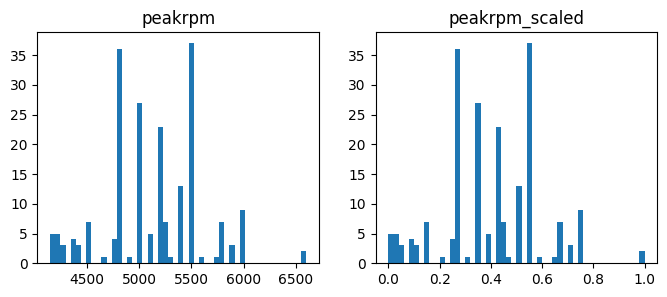

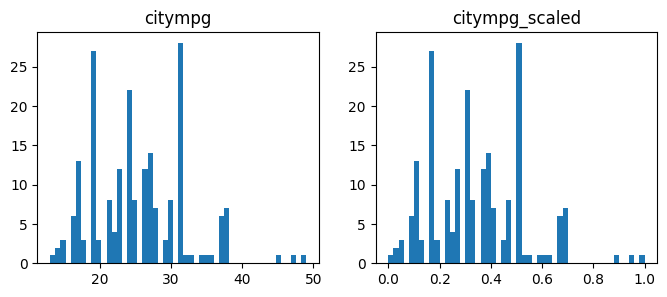

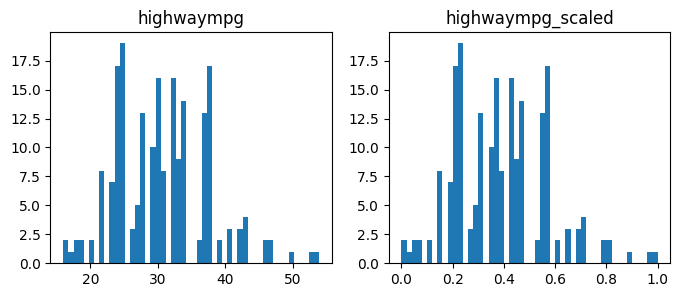

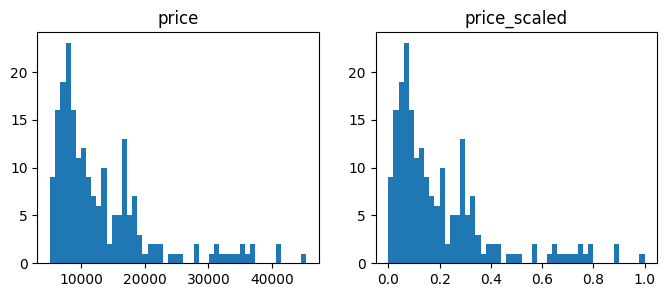

In [48]:
for col in data.columns:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data_scaled[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Корреляционный анализ данных

Построим корреляционные матрицы:

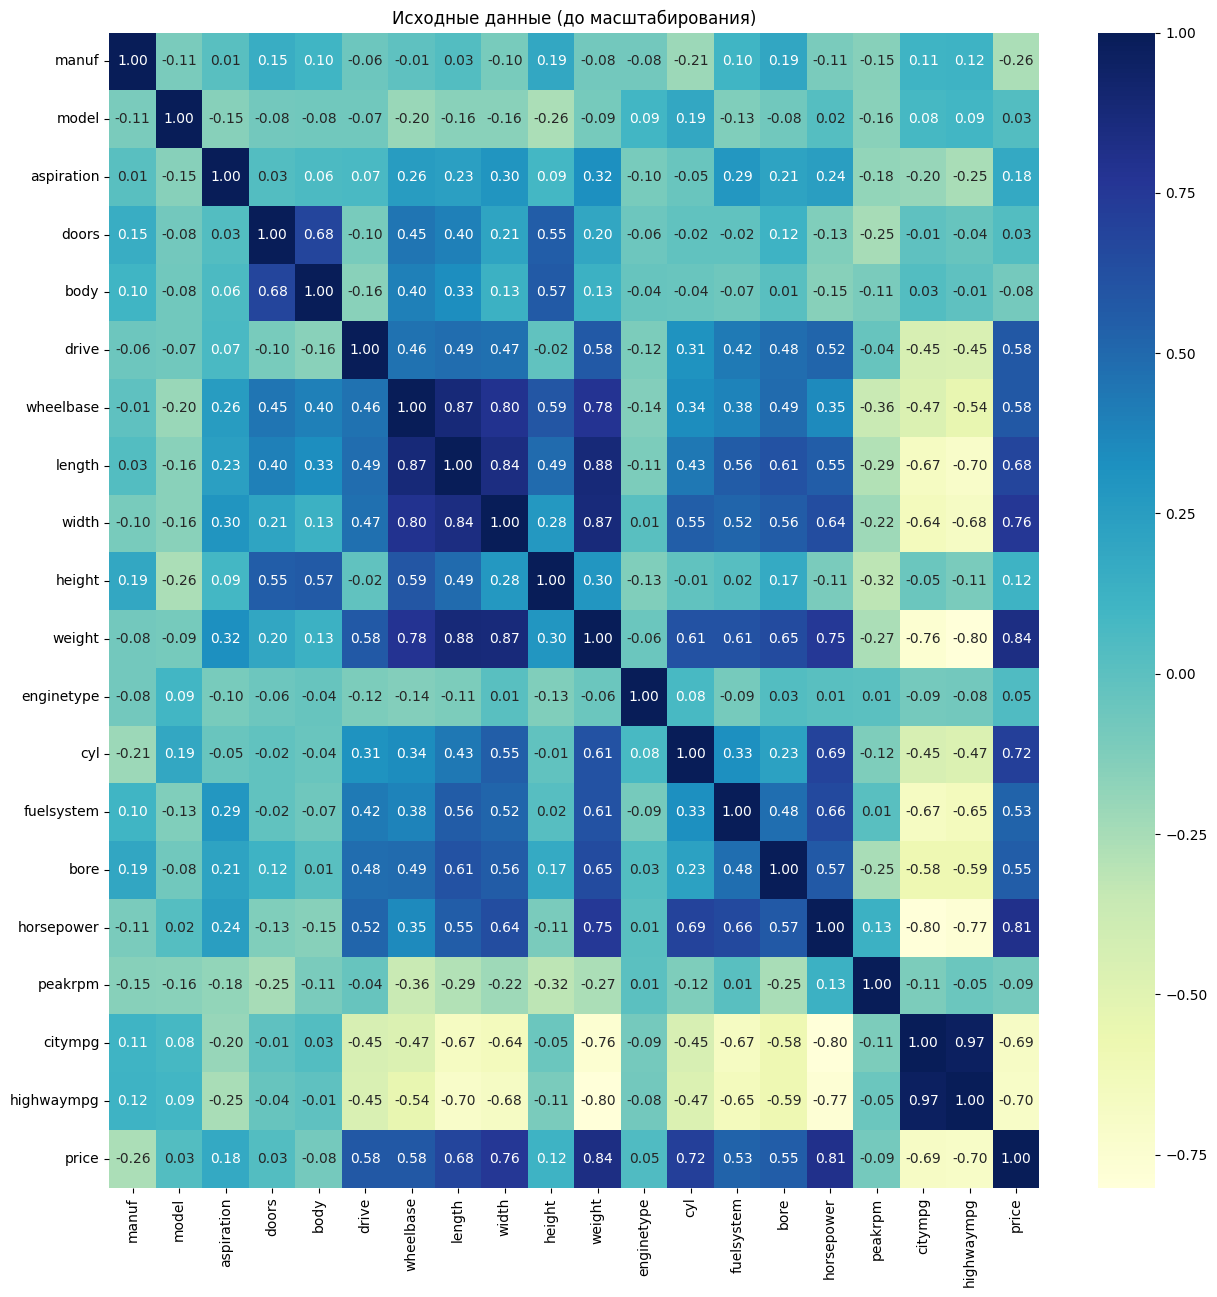

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data[data.columns].corr(), annot=True, fmt='.2f', cmap="YlGnBu")
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

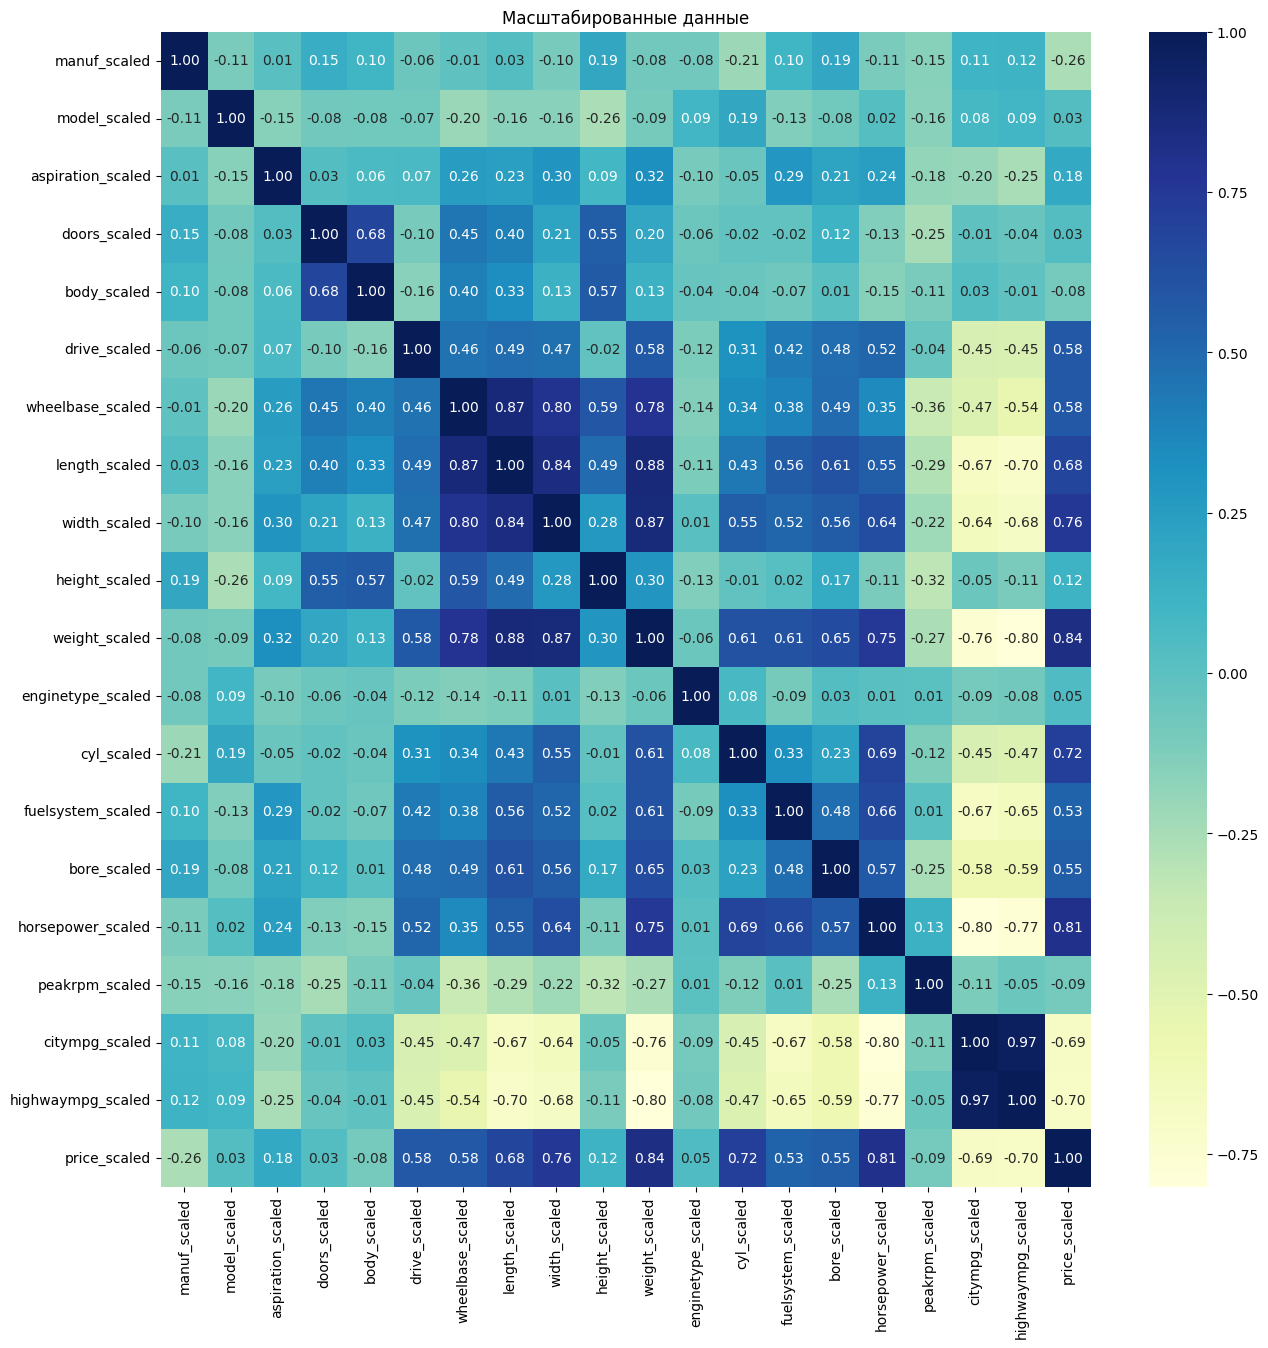

In [50]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_scaled[data_scaled.columns].corr(), annot=True, fmt='.2f', cmap="YlGnBu")
ax.set_title('Масштабированные данные')
plt.show()

На основании корреляционных матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных идентичны
- Целевой признак регрессии "price" наиболее сильно коррелирует с "drive" (0.58), "wheelbase" (0.58), "length" (0.68), "width" (0.76), "weight" (0.84), "cyl" (0.72) и "horsepower" (0.81). Эти признаки в модели регрессии оставляем
- Признаки "citympg" и "highwaympg" имеют корреляцию, близкую по модулю к 1, поэтому оставим только один из них - "citympg"
- Данные позволяют построить модель машинного обучения

Удалим ненужный признак:

In [51]:
data.drop(['highwaympg'], inplace=True, axis=1)
data_scaled.drop(['highwaympg_scaled'], inplace=True, axis=1)

In [52]:
data.head()

,manuf,model,aspiration,doors,body,drive,wheelbase,length,width,height,weight,enginetype,cyl,fuelsystem,bore,horsepower,peakrpm,citympg,price
0,0,78,0,2,0,2,88.6,168.8,64.1,48.8,2548,0,4,5,3.47,111,5000,21,13495.0
1,0,122,0,2,0,2,88.6,168.8,64.1,48.8,2548,0,4,5,3.47,111,5000,21,16500.0
2,0,28,0,2,2,2,94.5,171.2,65.5,52.4,2823,5,6,5,2.68,154,5000,19,16500.0
3,1,0,0,4,3,1,99.8,176.6,66.2,54.3,2337,3,4,5,3.19,102,5500,24,13950.0
4,1,1,0,4,3,0,99.4,176.6,66.4,54.3,2824,3,5,5,3.19,115,5500,18,17450.0


Построим графики зависимостей признаков с сильной корреляцией:

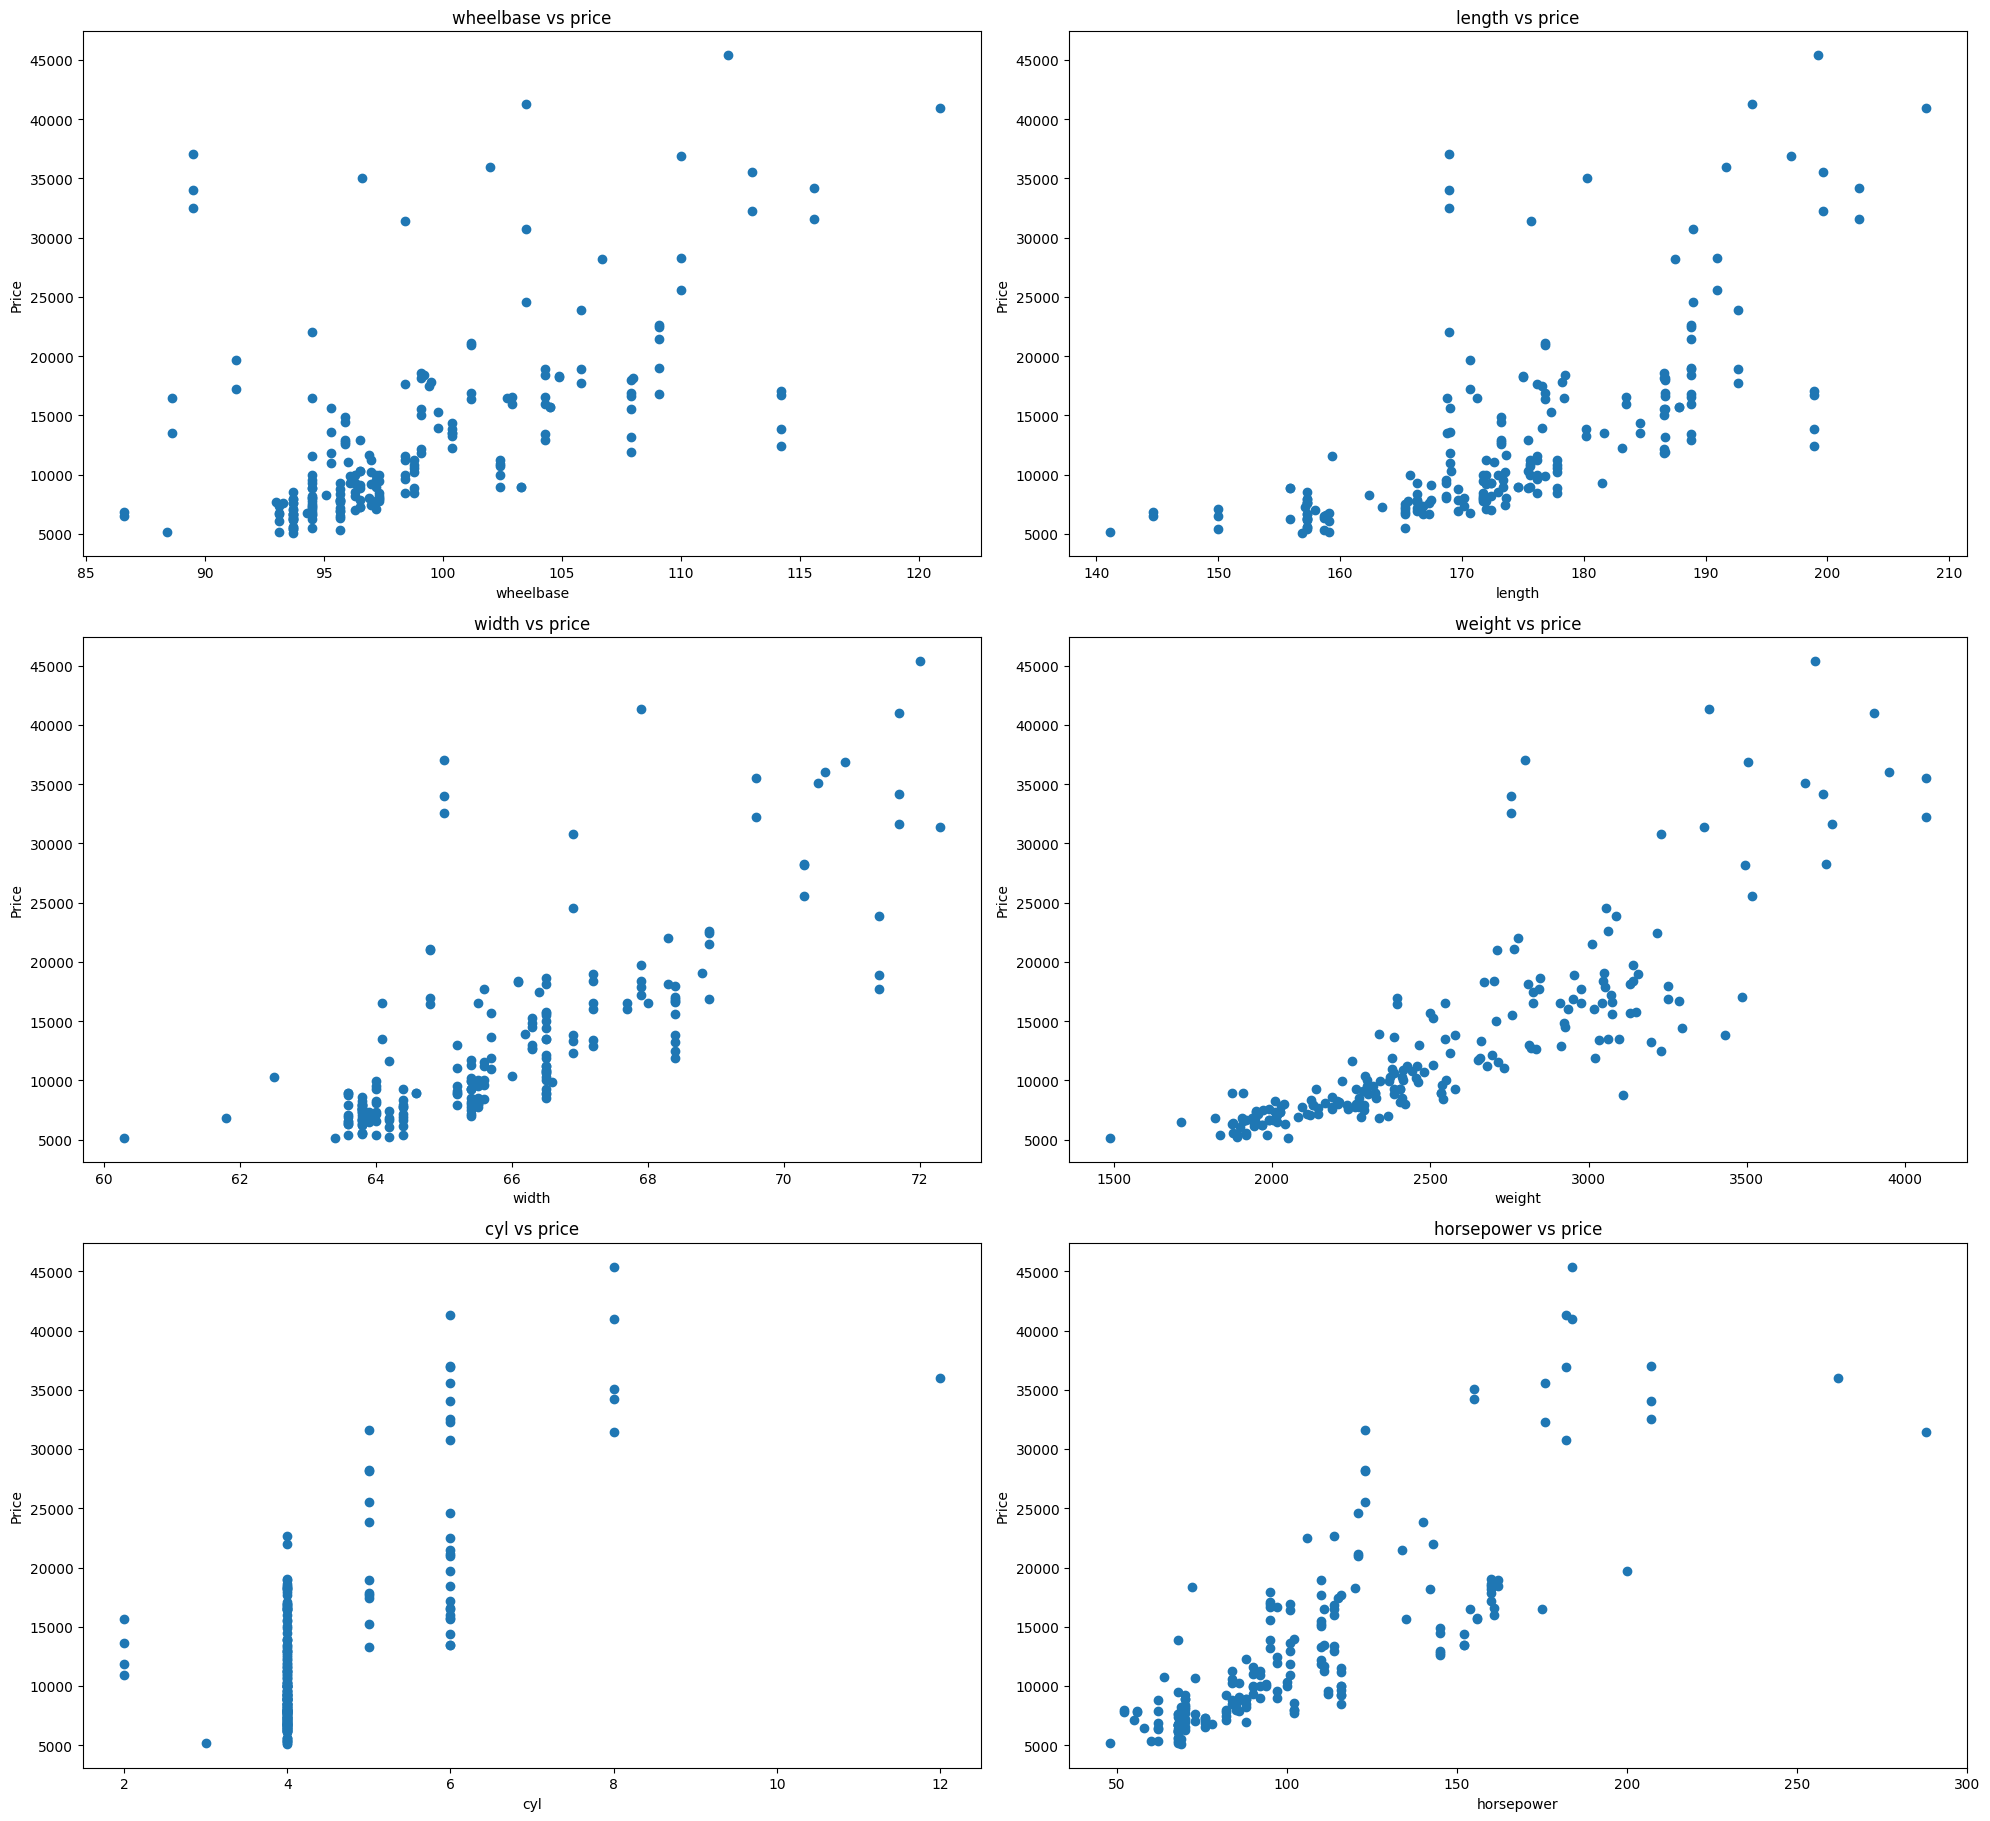

In [53]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,30))

scatter('wheelbase', 1)
scatter('length', 2)
scatter('width', 3)
scatter('weight', 4)
scatter('cyl', 5)
scatter('horsepower', 6)

plt.tight_layout()

## Выбор подходящих моделей для решения задачи регрессии

Для решения задачи регрессии будем использовать следующие модели:

- Линейная регрессия
- Модель ближайших соседей
- Модель опорных векторов
- Дерево решений
- Случайный лес
- Градиентный бустинг

## Выбор метрик для оценки качества моделей

В качестве метрик для решения задачи регрессии будем использовать метрики:

- Mean absolute error (средняя абсолютная ошибка)
- Mean squared error (средняя квадратичная ошибка)
- R2-score (коэффициент детерминации)

Они помогут определить качество моделей.

Метрики будем сохранять в класс:

In [66]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = pd.concat([self.df, pd.DataFrame(temp)], ignore_index=True)
        #self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Формирование обучающей и тестовой выборок

Разделим выборку:

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, data.price, random_state=1)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((153, 19), (153,), (52, 19), (52,))

## Построение базового решения (baseline) без подбора гиперпараметров

Построим базовые модели:

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
regr_models = {'LR': LinearRegression(), 
               'KNN_20':KNeighborsRegressor(n_neighbors=20),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

Сохраним метрики:

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
regrMetricLogger = MetricLogger()

In [70]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

Отобразим метрики:

In [71]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.0, MSE=0.0, R2=1.0
KNN_20 	 MAE=769.6, MSE=5081904.089, R2=0.924
SVR 	 MAE=5494.731, MSE=70686472.641, R2=-0.053
Tree 	 MAE=351.0, MSE=829432.923, R2=0.988
RF 	 MAE=201.566, MSE=288875.889, R2=0.996
GB 	 MAE=110.776, MSE=54139.135, R2=0.999


Чем ближе значение MAE и MSE к 0 и R2 к 1 - тем лучше качество регрессии.

Видно, что по трем метрикам лучшая модель регрессии - у линейной модели. Но также по метрике R2-score модели градиентного бустинга, случайного леса и ближайших соседей близки к линейной.

Худшая модель по всем трем метрикам - модель опорных векторов.

## Подбор оптимальной модели и гиперпараметра

Подберем оптимальные гиперпараметры: 

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
n_range = np.array(range(5,100,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [74]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_absolute_error')
regr_gs.fit(X_train, y_train)

CPU times: total: 891 ms
Wall time: 787 ms


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
             scoring='neg_mean_absolute_error')

Лучшая модель:

In [75]:
regr_gs.best_estimator_

KNeighborsRegressor()

Лучшее значение параметров:

In [76]:
regr_gs.best_params_

{'n_neighbors': 5}

Сохраним значение:

In [77]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'5'

Изменение качества:

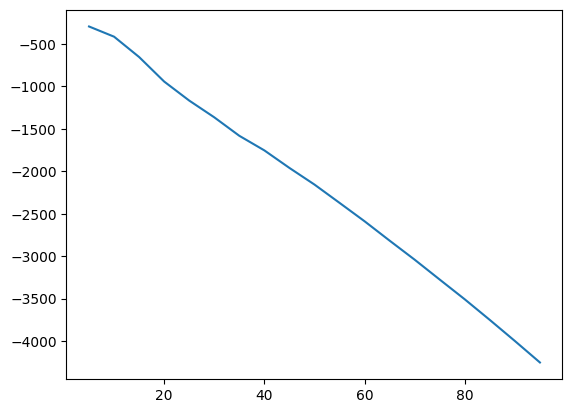

In [78]:
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

## Оптимальное значение гиперпараметра. Сравнение качества с baseline

Оптимальная модель - KNeighborsRegressor. Оптимальное значение гиперпараметра - 5.

Сравним метрики с baseline моделью:

In [79]:
regr_models_grid = {'KNN_20':KNeighborsRegressor(n_neighbors=20), 
                    str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [80]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_20 	 MAE=769.6, MSE=5081904.089, R2=0.924
KNN_5 	 MAE=263.517, MSE=417700.95, R2=0.994


Видим, что у оптимальной модели лучше качество, чем у исходной baseline-модели.

## Формирование выводов о качестве построенных моделей

Сравним все метрики.

In [81]:
regr_metrics = regrMetricLogger.df['metric'].unique()

Метрика Mean Absolute Error:

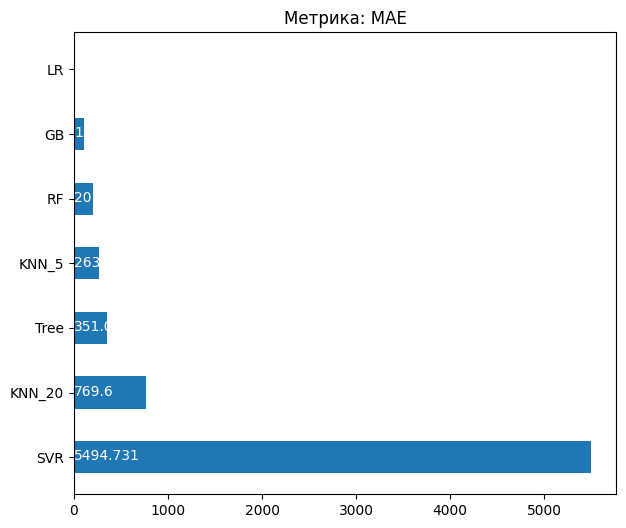

In [82]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

In [83]:
regrMetricLogger_no_svr = MetricLogger()

In [84]:
regr_models_no_svr = {'LR': LinearRegression(), 
               'KNN_20':KNeighborsRegressor(n_neighbors=20),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [85]:
for model_name, model in regr_models_no_svr.items():
    regr_train_model(model_name, model, regrMetricLogger_no_svr)

LR 	 MAE=0.0, MSE=0.0, R2=1.0
KNN_20 	 MAE=769.6, MSE=5081904.089, R2=0.924
Tree 	 MAE=491.186, MSE=1573089.279, R2=0.977
RF 	 MAE=180.777, MSE=220806.551, R2=0.997
GB 	 MAE=150.256, MSE=158517.023, R2=0.998


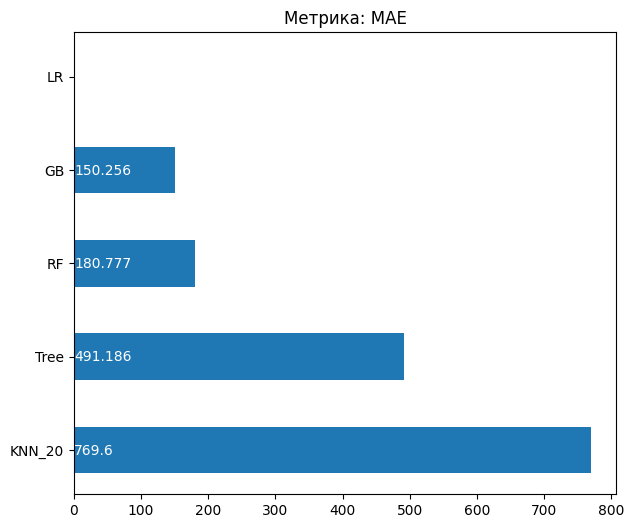

In [86]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

Чем ближе значение метрики к 0, тем качественне модель. Лучший результат показвывает модель линейной регрессии, худший - модель опорных векторов.

Метрика Mean Squarred Error:

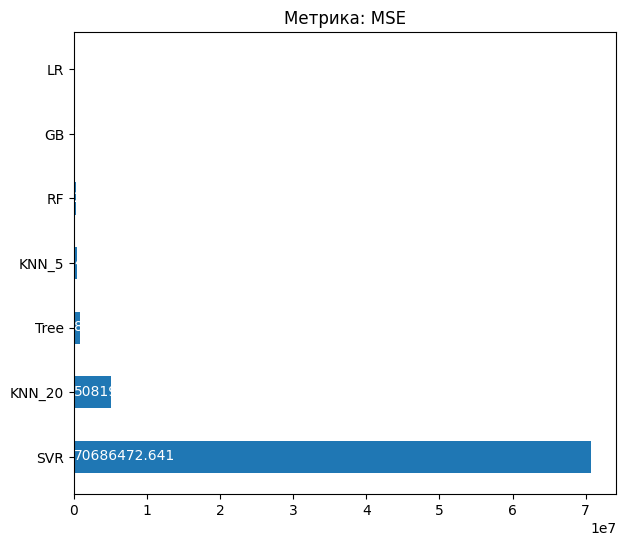

In [87]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

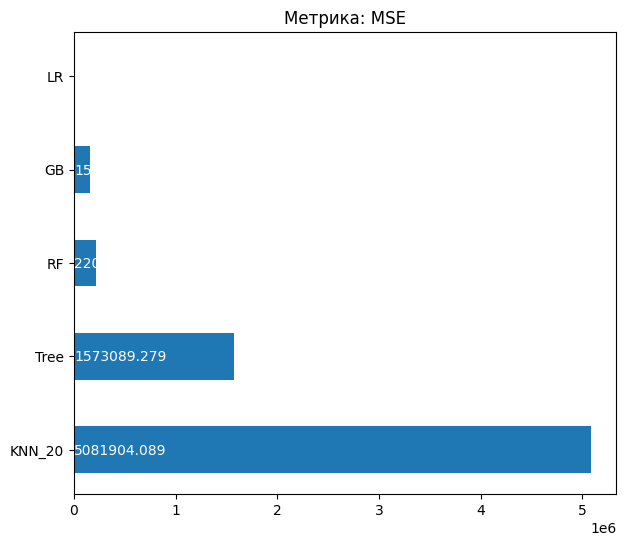

In [88]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

Чем ближе значение метрики к нулю, тем модель более качественна. Модель линейной регрессии выигрывает по качеству у остальных. Модель SVR обладает наихудшем качеством.

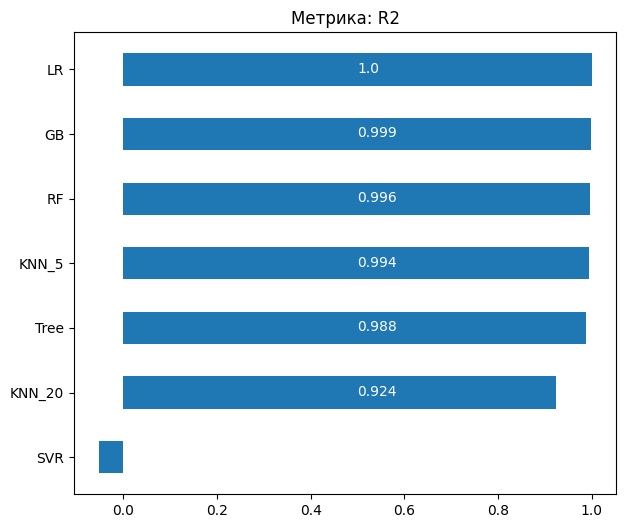

In [89]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

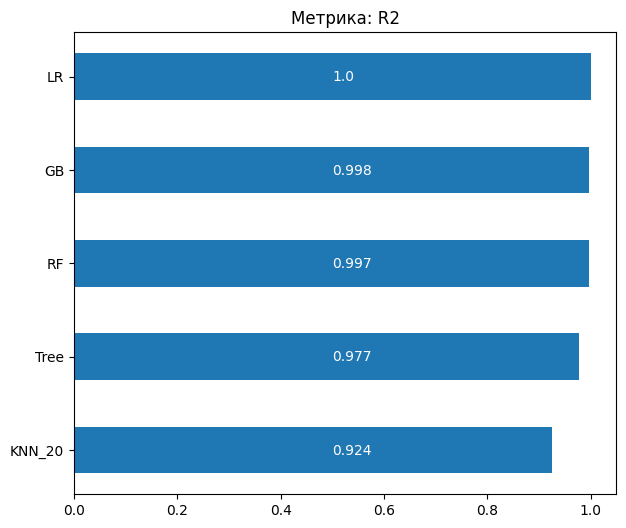

In [90]:
regrMetricLogger_no_svr.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

Исходя из метрики R2-score - наихудший результат показывает модель опорных векторов. Лучшими моделями можно считать модели линейной регрессии, градиентного бустинга, случайного леса и дерева решений.

Подводя итог: наиболее качественной моделью можно считать модель линейной регрессии.

# Заключение

В работе был  проведен разведочный анализ данных с обработкой данных с неинформативными признаками, пропусков и модификацией структуры и самих данных. Также было проведено кодирование категориальных признаков, масштабирование данных и сравнение масштабированных данных с исходными. Был выполнен корреляционный анализ и на его основании были выбраны модели для решения задачи регрессии. Исходные данные были разделены на тестовую и обучающую выборку, на основе этих выборок были обучены выбранные модели. Также была построена наиболее оптимальная модель. Все модели подверглись сравнению для определения наилучшего качества решения задачи регрессии, для этого использовались несколько метрик регрессии.